In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation

Text(0, 0.5, 'y')

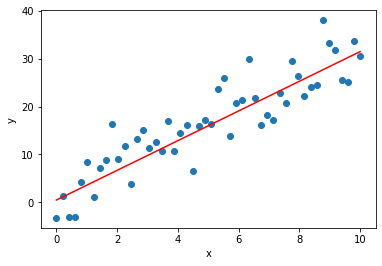

In [8]:
# 线性回归
class LinearRegression:

    def __init__(self, learning_rate=0.001, iter_max=100, batch_size=256):
        self.learning_rate_ = learning_rate
        self.iter_max_ = iter_max
        self.batch_size_ = batch_size

    # 初始化参数
    def init_theta(self):
        self.theta0_ = 0
        self.theta1_ = 0

    # 假设函数
    def linear(self, theta0, theta1, x):
        return theta0 + theta1 * x

    # 代价函数
    def cost(self, p_y, y):
        return 0.5 * np.power(y - p_y, 2).mean()

    # 预测
    def predict(self, x):
        return self.linear(self.theta0_, self.theta1_, x)

    # 梯度下降
    def grad_desc(self, theta0, theta1, x, y, alpha):
        p_y = self.linear(theta0, theta1, x)
        theta0 -= alpha * (p_y - y).sum() / len(y)
        theta1 -= alpha * ((p_y - y) * x).sum() / len(y)
        return theta0, theta1

    # 训练
    def train(self, x, y):
        self.init_theta()
        # 子集数量
        batches_n = math.ceil(len(y) / self.batch_size_)
        # 优化历史
        self.theta_h_ = [[self.theta0_, self.theta1_]]
        self.cost_h_ = [self.cost(self.predict(x), y)]
        # 迭代
        for i in range(self.iter_max_):
            # 随机排序
            idx = np.random.permutation(len(y))
            x, y = x[idx], y[idx]
            # 遍历子集
            for j in range(batches_n):
                x_ = x[j * self.batch_size_:(j + 1) * self.batch_size_]
                y_ = y[j * self.batch_size_:(j + 1) * self.batch_size_]
                self.theta0_, self.theta1_ = self.grad_desc(
                    self.theta0_, self.theta1_, x_, y_, self.learning_rate_
                )
            # 记录当前参数和代价
            self.theta_h_.append([self.theta0_, self.theta1_])
            self.cost_h_.append(self.cost(self.predict(x), y))
        self.theta_h_ = np.array(self.theta_h_)
        self.cost_h_ = np.array(self.cost_h_)



# 使用示例
x = np.linspace(0, 10, 50)
y = 3 * x + 2 + np.random.randn(50) * 5

model = LinearRegression()
model.train(x, y)

plt.scatter(x, y)
plt.plot(x, model.predict(x), c='r')
plt.xlabel('x')
plt.ylabel('y')

In [9]:
# logistic
import random

mu = 1  #期望为1
sigma = 3  #标准差为3
num = 100  #个数为100
rand_data = np.random.logistic(mu, sigma, num)

In [ ]:
def sigmoid(x):
    """
    :param x: 输入需要计算的值
    :return: 
    """
    return 1.0 / (1 + np.exp(-x))
 
 
def data_plot(data_list, weight):
    """
    :param data_list:数据点集合 
    :param weight: 参数集合
    :return: null
    """
    x_data = [list(i[0:2]) for i in data_list if i[2] == 0.0]
    y_data = [list(i[0:2]) for i in data_list if i[2] == 1.0]
    x_data = np.reshape(x_data, np.shape(x_data))
    y_data = np.reshape(y_data, np.shape(y_data))
    linear_x = np.arange(-4, 4, 1)
    linear_y = (-weight[0] - weight[1] * linear_x) / weight[2]
    print(linear_y)
    plt.figure(1)
    plt.scatter(x_data[:, 0], x_data[:, 1], c='r')
    plt.scatter(y_data[:, 0], y_data[:, 1], c='g')
    print(linear_x)
    print(linear_y.tolist()[0])
    plt.plot(linear_x, linear_y.tolist()[0])
    plt.show()
 
 
def grad_desc(data_mat, label_mat, rate, times):
    """
    :param data_mat: 数据特征
    :param label_mat: 数据标签
    :param rate: 速率
    :param times: 循环次数
    :return: 参数
    """
    data_mat = np.mat(data_mat)
    label_mat = np.mat(label_mat)
    m,n = np.shape(data_mat)
    weight = np.ones((n, 1))
    for i in range(times):
        h = sigmoid(data_mat * weight)
        error = h - label_mat
        weight = weight - rate * data_mat.transpose() * error
    return weight
 
 
def random_grad_desc(data_mat, label_mat, rate, times):
    """
    :param data_mat: 数据特征
    :param label_mat: 数据标签
    :param rate: 速率
    :param times: 循环次数
    :return: 参数
    """
    data_mat = np.mat(data_mat)
    m,n = np.shape(data_mat)
    weight = np.ones((n, 1))
    for i in range(times):
        for j in range(m):
            h = sigmoid(data_mat[j] * weight)
            error = h - label_mat[j]
            weight = weight - rate * data_mat[j].transpose() * error
    return weight
 
 
def improve_random_grad_desc(data_mat, label_mat, times):
    """
    :param data_mat: 数据特征
    :param label_mat: 数据标签
    :param rate: 速率
    :param times: 循环次数
    :return: 参数
    """
    data_mat = np.mat(data_mat)
    m,n = np.shape(data_mat)
    weight = np.ones((n, 1))
    for i in range(times):
        index_data = [i for i in range(m)]
        for j in range(m):
            rate = 0.0001 + 4 / (i + j + 1)
            index = random.sample(index_data, 1)
            h = sigmoid(data_mat[index] * weight)
            error = h - label_mat[index]
            weight = weight - rate * data_mat[index].transpose() * error
            index_data.remove(index[0])
    return weight